# Matrix Multiplication

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

import math
from sympy import *

In [2]:
## Rules for multiplication validity

m = 4
n = 3
k = 6

#make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

#test whitch multiplications are valid.
#think of your answer first, then test

np.matmul(A,B) #(4,3)x(3x6) = (4x6)
#np.matmul(A,A) #don't
np.matmul(A.T, C) #(3x4)x(4x6) = (3x6)
np.matmul(np.matrix.transpose(B),B) #(6x3)x(3x6) = (6x6)

array([[ 0.71812474, -1.18622008, -0.53763643,  1.31777467, -0.37034486,
         0.11211339],
       [-1.18622008,  5.48934199, -0.37640614, -2.00757056,  1.01575609,
        -0.99914871],
       [-0.53763643, -0.37640614,  0.8562279 , -1.02140838,  0.14388045,
         0.20415199],
       [ 1.31777467, -2.00757056, -1.02140838,  3.3124962 , -0.27017405,
         0.04670372],
       [-0.37034486,  1.01575609,  0.14388045, -0.27017405,  0.40890273,
        -0.20380069],
       [ 0.11211339, -0.99914871,  0.20415199,  0.04670372, -0.20380069,
         0.22144547]])

## Challenge

In [3]:
# implement matrix multiplication via layers
m = 4
n = 3

#generate 2 matrices (A,B)
A = np.random.randn(m,n)
B = np.random.randn(n,m)
#build the product matrix layer-wise (for-loop)
C1 = np.zeros((m,m))
              
for i in range(n):
    C1 += np.outer(A[:,i], B[i,:])

print(C1)
#implement the matrix multiplication directly
C2 = np.matmul(A,B)

#compare the results

if np.allclose(C1, C2):
    print("\nAs matrizes C1 e C2 são iguais dentro de uma margem numérica.")
else:
    print("\nAs matrizes C1 e C2 são diferentes.")
    print("Diferença:")
    print(C1 - C2)

for i in range(C1.shape[0]):  # Itera sobre as linhas
    for j in range(C1.shape[1]):  # Itera sobre as colunas
        if C1[i, j] == C2[i, j]:
            print(f"Elementos iguais em posição ({i}, {j}): {C1[i, j]}")
        else:
            print(f"Elementos diferentes em posição ({i}, {j}): C1={C1[i, j]}, C2={C2[i, j]}")
    
#print(direct)


[[-2.5274188  -0.79320967 -0.76846187  1.10167954]
 [-0.03537342 -0.37413589  0.3046479   1.61940297]
 [ 2.95982893  1.62695236  1.31055971 -0.79669952]
 [ 0.81575084 -1.96725151 -1.88442765 -4.82783484]]

As matrizes C1 e C2 são iguais dentro de uma margem numérica.
Elementos iguais em posição (0, 0): -2.5274187985194105
Elementos iguais em posição (0, 1): -0.7932096669687265
Elementos iguais em posição (0, 2): -0.7684618724378336
Elementos iguais em posição (0, 3): 1.1016795351508197
Elementos iguais em posição (1, 0): -0.03537342177266817
Elementos iguais em posição (1, 1): -0.37413589481169285
Elementos iguais em posição (1, 2): 0.3046478950982594
Elementos iguais em posição (1, 3): 1.6194029708342643
Elementos iguais em posição (2, 0): 2.9598289295090203
Elementos iguais em posição (2, 1): 1.6269523565993282
Elementos iguais em posição (2, 2): 1.3105597146516383
Elementos iguais em posição (2, 3): -0.7966995190214006
Elementos iguais em posição (3, 0): 0.8157508388664535
Elementos

## Order Operation

$$ (LIVE)^T = E^TV^TI^TL^T$$

In [4]:
n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

#result of forward multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )
print(res1)
print(" ")
#result of flipped multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T
print(res2) 

#test equality by subtracting (ignore possible computer rounding errors)
res1-res2

[[-4.65327726  1.1223085 ]
 [-3.88677481 -1.38505197]]
 
[[-4.65327726  1.1223085 ]
 [-3.88677481 -1.38505197]]


array([[0.0000000e+00, 4.4408921e-16],
       [4.4408921e-16, 0.0000000e+00]])

## Matrix Vector Multiplication

In [5]:
m = 4

#create matrices
N = np.random.randint(-10,11,(m,m))
print(N)
print(" ")
S = np.round(N.T*N /m**2) #scaled symmetric
print(S)
print(" ")

#and vector
w = np.array([-1, 0, 1, 2])
print(w)
print(" ")

#with symmetric matrix
print(f"1-{S@w}")
print(" ")
print(f"2-{S.T@w}")
print(" ")
print(f"3-{w@S}")
print(" ")
print(f"4-{w.T@S.T}")
print(" ")
print(f"5-{w.T@S}")
print(" ")

[[-9  6 -5  8]
 [-3  8  6 -1]
 [-3 -1  6 10]
 [-8  2 -1 -3]]
 
[[ 5. -1.  1. -4.]
 [-1.  4. -0. -0.]
 [ 1. -0.  2. -1.]
 [-4. -0. -1.  1.]]
 
[-1  0  1  2]
 
1-[-12.   1.  -1.   5.]
 
2-[-12.   1.  -1.   5.]
 
3-[-12.   1.  -1.   5.]
 
4-[-12.   1.  -1.   5.]
 
5-[-12.   1.  -1.   5.]
 


## 2D Transformation matrices

In [6]:
#2D input vector
v = np.array([-3, 2])

#2x2 transformation matrix
A = np.array([[1,-1], [2,1]])
print(A)
print(" ")

#outputvector is Av (convert v to column)
w = A@(np.matrix.transpose(v))
print(w)
print(" ")

#plot them
plt.plot([0, v[0]], [0,v[1]], label='v')
plt.plot([0, w[0]], [0,w[1]], label='Av')

plt.grid()
plt.axis((-6,6,-6,6)) #-x,+x, -y,+y
plt.legend()
plt.title('Rotation + Stretching')
plt.show()

[[ 1 -1]
 [ 2  1]]
 
[-5 -4]
 


<IPython.core.display.Javascript object>

In [7]:
## pure rotetion

#2D input vector
v = np.array([3, -2])
th = np.pi/50
print(f'th: {th}')
A = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
print(f'A: {A}')
print(" ")

#outputvector is Av (convert v to column)
w = A@(np.matrix.transpose(v))
print(w)
print(" ")

#plot them
plt.plot([0, v[0]], [0,v[1]], label='v')
plt.plot([0, w[0]], [0,w[1]], label='Av')

plt.grid()
plt.axis((-4,4,-4,4)) #-x,+x, -y,+y
plt.legend()
plt.title('Pure Rotation')
plt.show()

th: 0.06283185307179587
A: [[ 0.99802673 -0.06279052]
 [ 0.06279052  0.99802673]]
 
[ 3.11966122 -1.8076819 ]
 


## Challenge

In [8]:
thetas = np.linspace(0,2*np.pi, 100)
print(f'thetas: {thetas}')
print(" ")

vecmags = np.zeros((len(thetas),2))
#print(f'vecmags: {vecmags}')
print()

for i in range(len(thetas)):
    th = thetas[i]
    A1 = np.array([[2*math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])
    A2 = np.array([[math.cos(th), -math.sin(th)], [math.sin(th), math.cos(th)]])

    #cmopute vector magnitures
    vecmags[i,0] = np.linalg.norm(A1@v.T)
    vecmags[i,1] = np.linalg.norm(A2@v.T)

plt.plot(thetas, vecmags, 'o-') 
plt.xlabel("Rotation Angle (rad.)")
plt.ylabel("Av magnitude")
plt.legend(['Impure Rotation', 'Pure Rotation'])
plt.show()

thetas: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 

## Challenge 2

In [9]:
# generate (X,y) coordinates for a circle
x = np.linspace(-np.pi, np.pi, 100) #min, max e quantity
#print(x)
print(" ")

xy = np.vstack((np.cos(x), np.sin(x))).T
#print(xy)
print(np.shape(xy))
print(" ")

#plot the circle
plt.plot(xy[:,0], xy[:,1], 'o')
print(" ")

#create a 2x2 matrix, starting with I
T = np.array([[1,2], [2,1]])
print(T)
print(" ")

#multiply matrix by coordinates
newxy = xy@T

#plot the new coords. 
plt.plot(newxy[:,0], newxy[:,1], 'o')
print(" ")
plt.axis('square')
plt.show()
#try with various matrices

#try with a singular matrix (columns form a linearly dependent set)

 
(100, 2)
 
 
[[1 2]
 [2 1]]
 
 


## Additive and multiplicative matrix identities

## $$AI = IA = A || A+I \neq A$$
## $$A0 = 0A \neq A || A+0 = A$$

In [10]:
#size of matrices 
n = 4

#create matrices
A = np.round(10*np.random.randn( n,n))
print(A)
print(" ")
I = np.eye(n,n)
Z = np.zeros((n,n))

#testing both identities
np.array_equal(A@I, A)
np.array_equal(A, A@I)
np.array_equal(A, A+I)
np.array_equal(A+Z, A@I)

[[ 3. -0. -8. -6.]
 [-9.  6. 10. 10.]
 [-2.  8. -2. -4.]
 [13. -2.  6. -9.]]
 


True

## Additive and multiplicative symmetric matrices

In [11]:
##the additive method

#specify sizes
m = 5
n = 5

A = np.round(5*np.random.randn(m,n))
print(A)
print(" ")
S = (A+A.T)/2
print(S)
print(" ")

#A symmetric matrix minus its transpose should be all zeros
print(S-S.T)

[[-10.   2.  -6.  -2.  -2.]
 [ -1.   2.  -8.  -0. -10.]
 [ -0.  -5.   7.   1.  -1.]
 [  3.   7.  -2.  11.  -0.]
 [ -2.   4.  -4.  -3.  -6.]]
 
[[-10.    0.5  -3.    0.5  -2. ]
 [  0.5   2.   -6.5   3.5  -3. ]
 [ -3.   -6.5   7.   -0.5  -2.5]
 [  0.5   3.5  -0.5  11.   -1.5]
 [ -2.   -3.   -2.5  -1.5  -6. ]]
 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [12]:
## the multiplicative method

#specify sizes
m = 5
n = 3

# create matrices
A = np.round(5*np.random.randn(m,n))
AtA = A.T@A
AAt = A@A.T

#first show that they are squares
print(f'Shape pf AtA: {AtA.shape}')
print(f'Shape pf AAt: {AAt.shape}')

#show that they are symmetric
print(AtA-AtA.T), print(" ")

print(AAt-AAt.T)

Shape pf AtA: (3, 3)
Shape pf AAt: (5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Hadamard Multiplication

$$
\begin{bmatrix}
0_{} & 1_{} & 2_{} \\
-1_{} & 6_{} & 3_{}
\end{bmatrix}
\odot
\begin{bmatrix}
3_{} & 8_{} & 5_{} \\
4_{} & 1_{} & -5_{}
\end{bmatrix}
=
\begin{bmatrix}
0_{} & 8_{} & 10_{} \\
-4_{} & 6_{} & -15_{}
\end{bmatrix}
$$




In [13]:
m = 13
n = 2

#matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

#note the different syntax copared to @ for matrix multiplication

C1 =  np.multiply(A,B)
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1 - C2)

[[ 0.22832332 -0.28475579]
 [-0.61436397  0.7912471 ]
 [ 0.41589405 -0.04497889]
 [ 0.05959521  0.06083988]
 [-0.09427562  1.11147415]
 [ 0.12505311 -0.14198368]
 [-0.71516751  0.41002242]
 [-0.79279596  1.51912051]
 [-0.8000423  -0.86470375]
 [ 0.35149692  0.00476772]
 [ 0.78601031  2.02694926]
 [-1.55058093  0.42637216]
 [-0.44108764 -0.06478122]]
 
[[ 0.22832332 -0.28475579]
 [-0.61436397  0.7912471 ]
 [ 0.41589405 -0.04497889]
 [ 0.05959521  0.06083988]
 [-0.09427562  1.11147415]
 [ 0.12505311 -0.14198368]
 [-0.71516751  0.41002242]
 [-0.79279596  1.51912051]
 [-0.8000423  -0.86470375]
 [ 0.35149692  0.00476772]
 [ 0.78601031  2.02694926]
 [-1.55058093  0.42637216]
 [-0.44108764 -0.06478122]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


#### Challenge


In [14]:
#Create two symmetric matrices
m = 3
A = np.round(4*np.random.randn(m,m),0)
AtA = A.T@A
B = np.round(4*np.random.randn(m,m),0)
BtB = B.T@B
print(f'AtA:\n {AtA}')
print(f'BtB:\n {BtB}')

#compute sum, multiplicationm and Hadamart multiplication of the two matrices

#Sum
sum = AtA+BtB
print(f'Sum AtA+BtB:\n {sum}')

#Multiplication
mult1 = AtA@BtB
print(f'Mult1:\n {mult1}')

#Hadamard
had1 = AtA*BtB

print(f'Hadamard:\n {had1}')
print('-'*30)

#determine whether the result is still symmetric
print('SUM')
print(sum-sum.T), print(' ')
print('MULTIPLICATION MULT1')
print(mult1-mult1.T), print(' ')
print('HADAMARD')
print(had1-had1.T)

AtA:
 [[ 20. -18.  16.]
 [-18. 126.  -6.]
 [ 16.  -6.  20.]]
BtB:
 [[ 53. -14.  60.]
 [-14.  53. -49.]
 [ 60. -49. 113.]]
Sum AtA+BtB:
 [[ 73. -32.  76.]
 [-32. 179. -55.]
 [ 76. -55. 133.]]
Mult1:
 [[ 2272. -2018.  3890.]
 [-3078.  7224. -7932.]
 [ 2132. -1522.  3514.]]
Hadamard:
 [[1060.  252.  960.]
 [ 252. 6678.  294.]
 [ 960.  294. 2260.]]
------------------------------
SUM
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
 
MULTIPLICATION MULT1
[[    0.  1060.  1758.]
 [-1060.     0. -6410.]
 [-1758.  6410.     0.]]
 
HADAMARD
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Multiplication of two Symmetric Matrices

$$
\begin{bmatrix}
a_{} & c_{} \\
c_{} & d_{}
\end{bmatrix}
\cdot
\begin{bmatrix}
e_{} & f_{}  \\
f_{} & g_{}
\end{bmatrix}
=
\begin{bmatrix}
ae+cf_{} & af+cg_{} \\
ce+df_{} & cf+df_{} 
\end{bmatrix}
$$

#### What if a=d & e=g

In [15]:
#using sympy library
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u = symbols('a b c d e f g h i j k l m n o p q r s t u')

#symmetric and constant-diagonal matrices

A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]  ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]  ])

#confirmation that A and B are symmetric
print(A - A.transpose() )
print(B - B.transpose() )


# and constant diagonal
for i in range (0, np.size(A,0)):
    print(A[i,i])
for i in range (0, np.size(B,0)):
    print(B[i,i])

Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [16]:
#nice printint in sympy
init_printing()

#but AB neq (AB)'
A@B - A@B.T

#maybe for submatrix

n=2
A1 = A[0:n, 0:n]
B1 = B[0:n, 0:n]

A1@B1 - (A1@B1).T

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

#### Challenge


In [17]:
#Create 2 matrices 4x4: full (not 0 ) and diagonal
A = np.random.randn(4,4)
B = np.diag(np.random.randn(4))

# print(f'A:\n {A}')
# print(f'B:\n {B}')

#multiply each matrix by itself (A*A) = standard and hadamart multiplications

AA= A@A
BB = B@B

hadaA = A*A
hadaB = B*B

print('STANDARD')
print(f'AA:\n {AA}')
print('HADAMARD')
print(f'HadaA:\n {hadaA}'), print(' ')
print('STANDARD')
print(f'BB:\n {BB}')
print('HADAMARD')
print(f'HadaB:\n {hadaB}')
print(' ')



STANDARD
AA:
 [[ 4.08100694 -0.5242857  -2.60008232 -2.37278963]
 [-1.38917346 -0.66394029 -2.66369118  0.75288075]
 [ 2.79573597  3.62943123 -0.97049338  0.19738282]
 [-0.81264521  1.86149281 -0.82410844  2.27383093]]
HADAMARD
HadaA:
 [[7.92229880e-01 3.45239538e+00 1.42352815e-03 1.18381135e+00]
 [1.62523537e+00 5.41783710e-02 2.79951788e+00 1.31666368e-02]
 [7.40338883e-02 3.25900390e+00 1.84151239e+00 1.92893755e-01]
 [6.99160014e-01 3.34130675e-01 2.03785021e-01 1.23212845e+00]]
 
STANDARD
BB:
 [[0.00510532 0.         0.         0.        ]
 [0.         2.41945409 0.         0.        ]
 [0.         0.         4.30710644 0.        ]
 [0.         0.         0.         0.83574619]]
HADAMARD
HadaB:
 [[0.00510532 0.         0.         0.        ]
 [0.         2.41945409 0.         0.        ]
 [0.         0.         4.30710644 0.        ]
 [0.         0.         0.         0.83574619]]
 


## Fourier transform via matrix multiplication

### $$ F_{j,k} = w^m \\[-5pt] $$
### $$ w = e^{(-2\pi\sqrt -1/n)} $$
### $$ m = (j-1)(k-1) $$
### $$ X = Fx $$


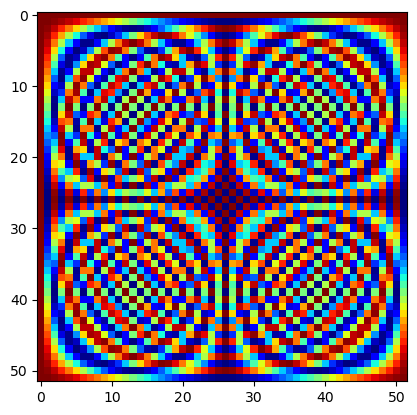

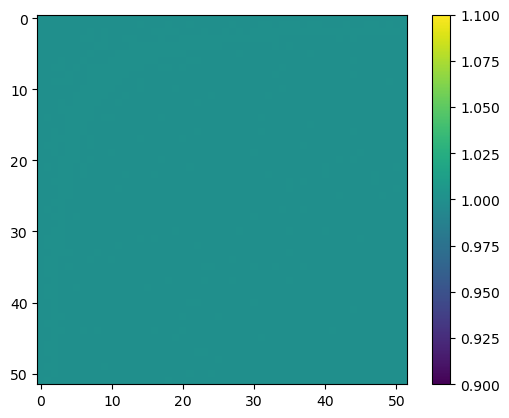

X1 == X2: True


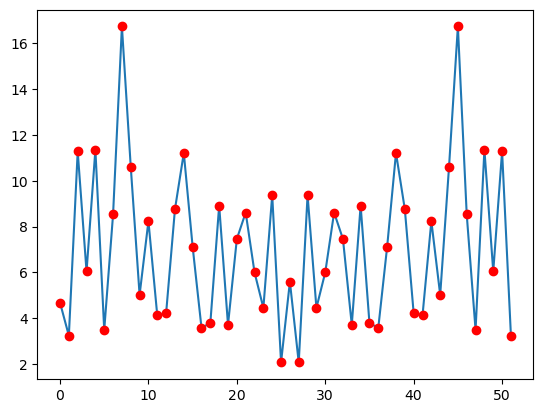

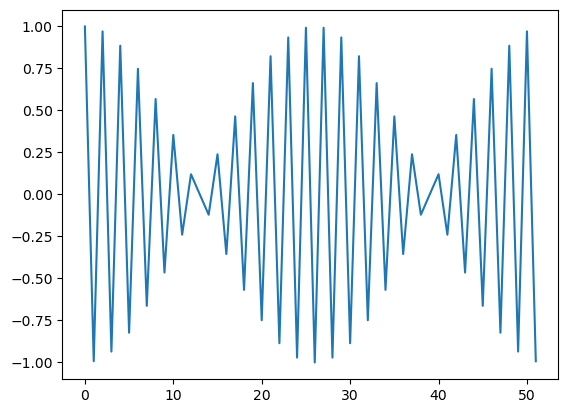

In [20]:
#Fourier Transformation

n = 52
omega = np.e**(-2*np.pi*1j/n)

#Initialize a complex matrix
F = np.zeros((n,n), dtype=complex)

for j in range (n):
    for k in range(n):
        m = j*k
        F[j,k] = omega**m


plt.imshow(F.real, cmap='jet')
plt.show()

plt.imshow(abs(F))
plt.colorbar()
plt.show()

x = np.random.randn(n)

X1 = F@x
X2 = np.fft.fft(x)
print(f'X1 == X2: {np.allclose(X1,X2)}')

#plot

plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()
plt.plot(F.real[:,25])
plt.show()

## Frobenius Dot Product

S1:  ELEMENT-WISE MULTIPLICATION  
S2:  SUM ALL ELEMENTS  

S1: VECTORIZE BOTH MATRICES  
S2: COMPUTE VECTOR DOT PRODUCT  

#### Vectorizing a matrix

$$
\text{vec}\left(
\begin{bmatrix} 
a_{} & c_{} & e_{}\\
b_{} & d_{} & f_{}
\end{bmatrix}
\right)
=
\begin{bmatrix}
a_{} \\
b_{} \\
c_{} \\
d_{} \\
e_{} \\
f_{}
\end{bmatrix}
$$

$$ <A,B>_{F} = tr(A^{T}B)$$
$$ norm(A) = \sqrt{<A,A>_{F}} = \sqrt{tr(A^{T}A)}$$

In [28]:
#any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

#first vectorize, then vector-dot-product
Av = np.reshape(A, m*n, order = 'F') #'F' reshapes by columns instead of by rows
print(Av), print(' ')
Bv = np.reshape(B, m*n, order = 'F')
print(Bv), print(' ')

frob_dp = np.dot(Av, Bv)
print(frob_dp)

#trace method
frob_dp2 = np.trace(A.T@B)
print(frob_dp2) # Same result as dot

#matrix norm
Anorm = np.linalg.norm(A, 'fro') #fro = frobenius
Anorm2 = np.sqrt(np.trace(A.T@A))

print(Anorm)
print(Anorm2)

[-0.78628945  0.31535304  0.03102091  1.37826464  1.0525095   1.3040688
  0.4448863  -0.08236577  0.58152961 -0.75122028  0.11526237  0.22900809
  0.31141587 -1.15875846  1.96876283 -0.67635076 -0.74768945 -0.50702683
  0.11217063  0.42833496  0.61578202  0.13184337 -0.32219819 -1.66794476
 -1.52548639 -1.22029697  0.48406191 -1.54231017  0.30739303  2.92340906
 -0.40977425  0.11171331  0.2166389   0.48681728 -0.34386425 -0.73046902]
 
[ 1.31234326  0.09828626  1.1471426   1.93203181 -1.68881631  0.7476522
 -0.58699292 -0.78891992 -1.22550452  0.85098622 -0.39386279  0.81957979
  0.79907175  0.711663   -0.28366103 -0.18911517  0.74362759 -0.05492987
  1.75041186  1.20953852 -1.07090468  0.16392275  1.88698609 -2.67858283
 -0.88555959 -0.57232929  1.43459304  0.27998544  1.18094514 -1.14358556
 -0.04651248  0.58076113 -1.31277598 -0.40418536 -2.0306742   1.34383133]
 
0.542264610201852
0.5422646102018529
5.731804984151903
5.731804984151903


## Matrix Norms

#### Frobenious norm (Euclidean Norm)
$$ norm(A) = \sqrt{<A,A>_{F}} = \sqrt{tr(A^{T}A)}$$

#### Induced 2-norm 
### $$ ||A|| = sup\frac{||Ax||_{p}}{||x||_{p}}, x \neq 0 $$

#### Schattern p-norm 
### $$ ||A||_{p} = (\sum_{i=1}^r \sigma_{i}^{p})^{1/p} $$
Delta = singular valuies of the matrix

In [38]:
#Create matrix
A = np.array([[1,2,3], [4,5,6], [7,7,9]])
print(f'A: \n {A}'), print(' ')

#QR decomposition: Optional orthogonal matrix to show that 2-norm is 1
Q, R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A, 'fro')
print(f'normFrob: \n {normFrob}'), print(' ')

# Induced 2- norm
normInd2 = np.linalg.norm(A, 2)
print(f'normInd2: \n {normInd2}'), print(' ')

#schatten p-norm
p = 1
s = np.linalg.svd(A)[1]  # Get the singular values
normSchat = np.sum(s**p)**(1/p)
print(f'normSchat: \n {normSchat}'), print(' ')

A: 
 [[1 2 3]
 [4 5 6]
 [7 7 9]]
 
normFrob: 
 16.431676725154983
 
normInd2: 
 16.392007827749776
 
normSchat: 
 17.818241836274783
 


(None, None)

## Self -Adjoint Operator

## $$ <Av, w> = <v,Aw>, v \neq w $$
1. **A is square(mxm)**
2. **A is symmetric**
3. **v and w are the same size (mx1)**
## $$ (Av)^{T}w = v^{T}A^{T}w = v^{T}Aw $$ 

In [44]:
m = 5

A = np.random.randn(m,m)
A = A@A.T
print(f'A: \n {A}'), print(' ')
v = np.random.randn(m) #array
w = np.random.rand(m)
print(f'v: \n {v}'), print(' ')
print(f'w: \n {w}'), print(' ')

np.dot(A@v, w) - np.dot(v, A@w)

A: 
 [[ 4.34425262  0.35825555 -0.23083797  0.01653436  2.14538078]
 [ 0.35825555  1.97903431 -0.27188365  2.7473623   0.52547202]
 [-0.23083797 -0.27188365  0.64967983 -0.18460156  0.82898138]
 [ 0.01653436  2.7473623  -0.18460156  5.14561035 -0.36419716]
 [ 2.14538078  0.52547202  0.82898138 -0.36419716  4.35869309]]
 
v: 
 [ 1.32662892  0.13730849  1.46248074 -0.28449162  0.89057193]
 
w: 
 [0.61853528 0.22197043 0.26304042 0.60470262 0.22288797]
 


## Element -wise matrix division

$$
\begin{bmatrix}
0_{} & 1_{} & 2_{} \\
-4_{} & 6_{} & 3_{}
\end{bmatrix}
\oslash
\begin{bmatrix}
3_{} & 8_{} & 5_{} \\
4_{} & 1_{} & -5_{}
\end{bmatrix}
=
\begin{bmatrix}
0_{} & 1/8_{} & 2/5_{} \\
-1_{} & 6_{} & -3/5_{}
\end{bmatrix}
$$


## Challenge 

#### Matrix asymmetry index
### $$ a_{i} = \frac{||Ã||}{||A||} , \text{Ratio of norms}$$
### $$ Ã= \frac{A-A^{T}}{2}, \text{Asymetric part of A} $$

In [46]:
## Part 1: implement MAI

def MAI(A):
    Aanti = (A-A.T)/2
    mai = np.linalg.norm(Aanti) / np.linalg.norm(A)
    return mai



In [62]:
## Part 2 : compute MAI for symmetric, skew-symmetric, and random matrix

A = np.random.randn(5,5)
#A = (A+A.T)/2 #creating a symmetric matrix
print(f'A: \n {A}'), print(' ')

MAI(A)

A: 
 [[-1.46848356  1.61619985  0.86655453  0.74014349  0.74005027]
 [-1.13093017  0.1569165  -0.79818894 -0.53474989 -0.86287077]
 [ 0.71581079 -0.66584899  0.1041549   0.21180046  0.78919035]
 [ 0.50789338 -0.29838451  0.06446767  0.26088847 -1.89511372]
 [-0.36005233  0.48697491 -0.95349109 -0.1529149   1.54192183]]
 


In [63]:
## Part 3: formula for mixing skew/symmetric matrices


## $$ B=(1-p)(A+A^{T})+p(A-A^{T}) $$

In [74]:
p = 1 #if 1, antisymetric matrix, 0, symmetric. 
A = np.random.randn(5,5)
B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2

print(f'B: \n {B}'), print(' ')

B: 
 [[ 0.         -1.68426075  0.81883754 -0.09014149  0.43724354]
 [ 1.68426075  0.          0.24617893  1.28636892 -0.4183004 ]
 [-0.81883754 -0.24617893  0.         -0.68011604  0.8311752 ]
 [ 0.09014149 -1.28636892  0.68011604  0.         -1.02483579]
 [-0.43724354  0.4183004  -0.8311752   1.02483579  0.        ]]
 


(None, None)

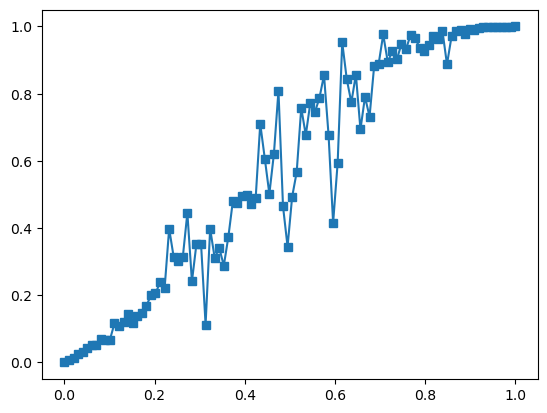

In [73]:
# Part 4: test on random matrices

ps = np.linspace(0,1,100)
mai =  np.zeros(len(ps))

for i in range(len(ps)):
    #Create ta matrix
    p = ps[i]
    A = np.random.randn(5,5)
    B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2

    #compute and store the MAI
    mai[i] = MAI(B)

plt.plot(ps,mai, 's-')
plt.show()